<a href="https://www.kaggle.com/code/gordonstevens/amazon-musical-instruments-ratings-data-analysis?scriptVersionId=141952162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### NLP: Musical Instruments Reviews
#### Notebook by: Ari Cerrahyan and Gordon Stevens 

> ## Dataset attribution and information

The dataset used in this project was sourced from: http://jmcauley.ucsd.edu/data/amazon/
It is supplied by Julian McAuley of the University of California San Diego (UCSD).

Description provided by the author:

This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.
This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

The dataset is "Musical Instruments: 5-core" sourced directly from: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Musical_Instruments_5.json.gz

After ungzipping, the file Musical_Instruments_5.json is acquired. The JSON file is used directly with pandas to build the initial dataframe. The gzip file is not used in favour of speed, and is hosted remotely in a GitHub public repository for ease of use and submission.

Feature information:
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- helpful - helpfulness rating of the review, e.g. 2/3
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)

> # Part 1: Dataset exploration

#### Load dataset and describe features

In [1]:
import pandas as pd
random_state = 22
df = pd.read_json(path_or_buf=r'/kaggle/input/amazon-musical-instruments-reviews-julian-mcauley/Musical_Instruments_5.json', lines=True) # REF (read_json): https://pandas.pydata.org/docs/reference/api/pandas.read_json.html
df.head(9)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5,Great cable,1215302400,"07 6, 2008"


Insights: Features: reviewerID, asin, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [3]:
print(f'Overall review, minimum value: {df.overall.min()}, maximum value: {df.overall.max()}')
print(f'Number of rows in "helpful" column which contain ratings: {df.helpful.str.count("[0, 0]").sum()}')

Overall review, minimum value: 1, maximum value: 5
Number of rows in "helpful" column which contain ratings: 0.0


Insights: reviewerID, asin, reviewerName, helpful, reviewText, summary, and reviewTime are all objects, while summary amd unixReviewTime are integer types.

1a. Counts, averages

In [4]:
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

#### Found: 10261 reviews, however reviewerName is missing in 27 entries.

In [5]:
from datetime import datetime
print(f'First review in dataset posted on: {datetime.utcfromtimestamp(df.unixReviewTime.min()).strftime("%Y-%m-%d")}.\nFinal review in dataset posted on: {datetime.utcfromtimestamp(df.unixReviewTime.max()).strftime("%Y-%m-%d")}.')
print(f'This dataset has reviews spanning {(float(df.unixReviewTime.max())-float(df.unixReviewTime.min()))/(60*60*24):.0f} days.')   # REF (Elapsed days between 2 unix timestamps): https://stackoverflow.com/questions/45603232/python-difference-between-two-unix-timestamps

First review in dataset posted on: 2004-09-18.
Final review in dataset posted on: 2014-07-22.
This dataset has reviews spanning 3594 days.


Insights: The musical instruments dataset ranges from September 18, 2004 to July 22, 2014, a total of 3594 days. 

> ### 1b. Distribution of the number of reviews across products

Insights:
- Upon further inspection, some review texts contain a few words such as "Five stars" and other reviews are novel length, so we need a new column for character counts.
- Also, we need a more usable helpfulness review for each review. "helpful" is in format [13, 14] whereas 13 are positive, 14 are negative
- Create new columns: review text length, helpful review rating, review year, and renew month.

In [6]:
df['reviewTextLength'] = df.reviewText.apply(len)

def apply_new_helpful_rating(value):
  if (value[1] > 0):
    return value[0]/value[1]
  else:
    return 0
df['helpfulRating'] = df.helpful.apply(apply_new_helpful_rating)

def apply_new_reviewyear(value_timestamp):   # REF (timestamp fun!): https://stackoverflow.com/questions/62292464/how-do-i-add-a-year-and-month-columns-to-my-pandas-dataframe-using-unix-timestam
  return datetime.utcfromtimestamp(value_timestamp).year

df['reviewYear'] = df.unixReviewTime.apply(apply_new_reviewyear)

def apply_new_reviewmonth(value_timestamp):
  return datetime.utcfromtimestamp(value_timestamp).month

df['reviewMonth'] = df.unixReviewTime.apply(apply_new_reviewmonth)

#### Rearrange the order of the columns for neatness and readability

In [7]:
cols = ['reviewerID','asin','reviewerName','helpful','helpfulRating','reviewText','reviewTextLength','overall','summary','unixReviewTime','reviewTime','reviewYear','reviewMonth']
df = df.reindex(columns=cols)

In [8]:
df.head(9)

,reviewerID,asin,reviewerName,helpful,helpfulRating,reviewText,reviewTextLength,overall,summary,unixReviewTime,reviewTime,reviewYear,reviewMonth
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",0.000000,"Not much to write about here, but it does exac...",268,5,good,1393545600,"02 28, 2014",2014,2
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",0.928571,The product does exactly as it should and is q...,544,5,Jake,1363392000,"03 16, 2013",2013,3
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",1.000000,The primary job of this device is to block the...,436,5,It Does The Job Well,1377648000,"08 28, 2013",2013,8
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",0.000000,Nice windscreen protects my MXL mic and preven...,206,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",2014,2
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",0.000000,This pop filter is great. It looks and perform...,159,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",2014,2
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",0.000000,So good that I bought another one. Love the h...,234,5,The Best Cable,1356048000,"12 21, 2012",2012,12
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",0.000000,"I have used monster cables for years, and with...",191,5,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",2014,1
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",0.000000,I now use this cable to run from the output of...,845,3,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",2012,11
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",0.000000,Perfect for my Epiphone Sheraton II. Monster ...,201,5,Great cable,1215302400,"07 6, 2008",2008,7


In [9]:
df_review_year = df['reviewYear'].value_counts(ascending=True).sort_index(ascending=True).rename_axis('year').reset_index(name='reviews')   # REF (Create df from value_counts()): https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe and https://re-thought.com/pandas-value_counts/
df_review_year

,year,reviews
0,2004,7
1,2005,4
2,2006,10
3,2007,22
4,2008,63
5,2009,128
6,2010,350
7,2011,1007
8,2012,1936
9,2013,4055


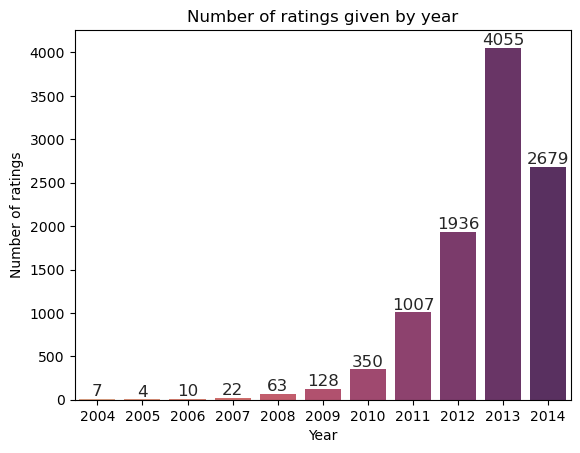

In [10]:
import seaborn as sns
sns.color_palette('flare', as_cmap=True)
ax = sns.barplot(x=df_review_year.year, y=df_review_year.reviews, palette='flare')
ax.set(title='Number of ratings given by year', xlabel='Year', ylabel='Number of ratings')
sns.set_theme(rc={'figure.figsize':(13,7)})   # REF (Seaborn figsize through rc): https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package
for i in ax.containers: ax.bar_label(i,)

Insights: reviewerID appears to be assigned by the system, reviewerName appears to be whatever they want to type, summary is the title for the review, reviewYear and reviewMonth are derived here from unixReviewTime as it is the most accurate, reviewTime may have some irregularities, such as "07 6, 2008" where a trailing 0 is found on the 7 and not on the 6. Without viewing more in the dataset to check formatting and consistency, unixReviewTime will be favoured.

In [11]:
df_review_month = df['reviewMonth'].value_counts(ascending=True).sort_index(ascending=True).rename_axis('month').reset_index(name='reviews')
df_review_month['monthName'] = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_review_month

,month,reviews,monthName
0,1,1266,January
1,2,1063,February
2,3,1043,March
3,4,922,April
4,5,851,May
5,6,809,June
6,7,745,July
7,8,616,August
8,9,582,September
9,10,612,October


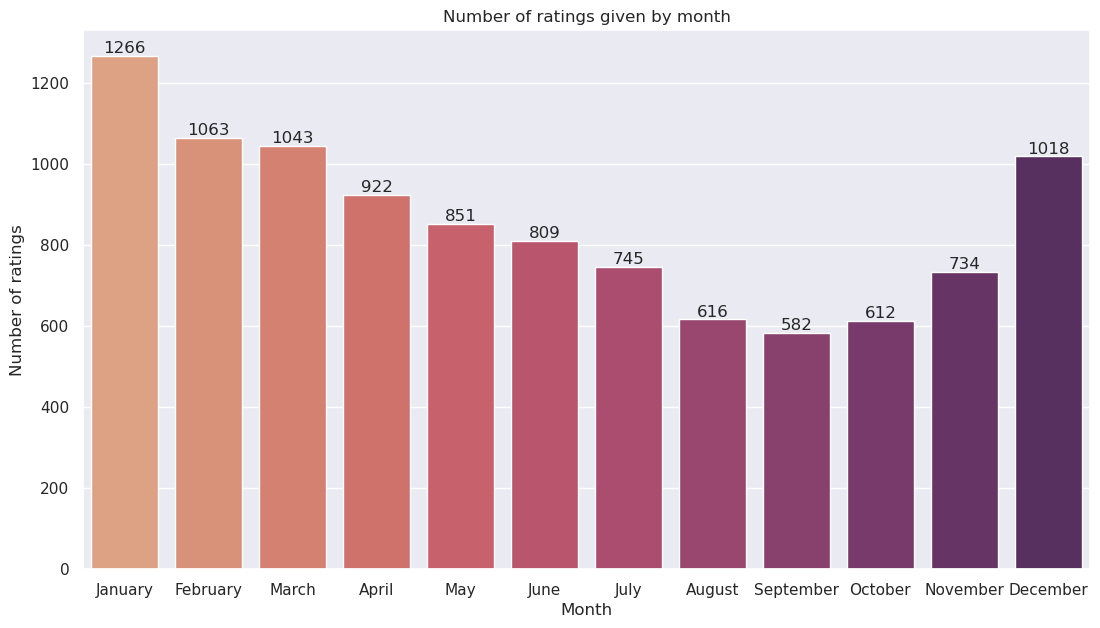

In [12]:
sns.color_palette('flare', as_cmap=True)
ax = sns.barplot(x=df_review_month.monthName, y=df_review_month.reviews, palette='flare')
ax.set(title='Number of ratings given by month', xlabel='Month', ylabel='Number of ratings')
sns.set_theme(rc={'figure.figsize':(13,7)})   # REF (Seaborn figsize through rc): https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package
for i in ax.containers: ax.bar_label(i,)

Insights: More reviews seem to occur around or following peak buying times, especially before, during and immediately after the holiday buying season.

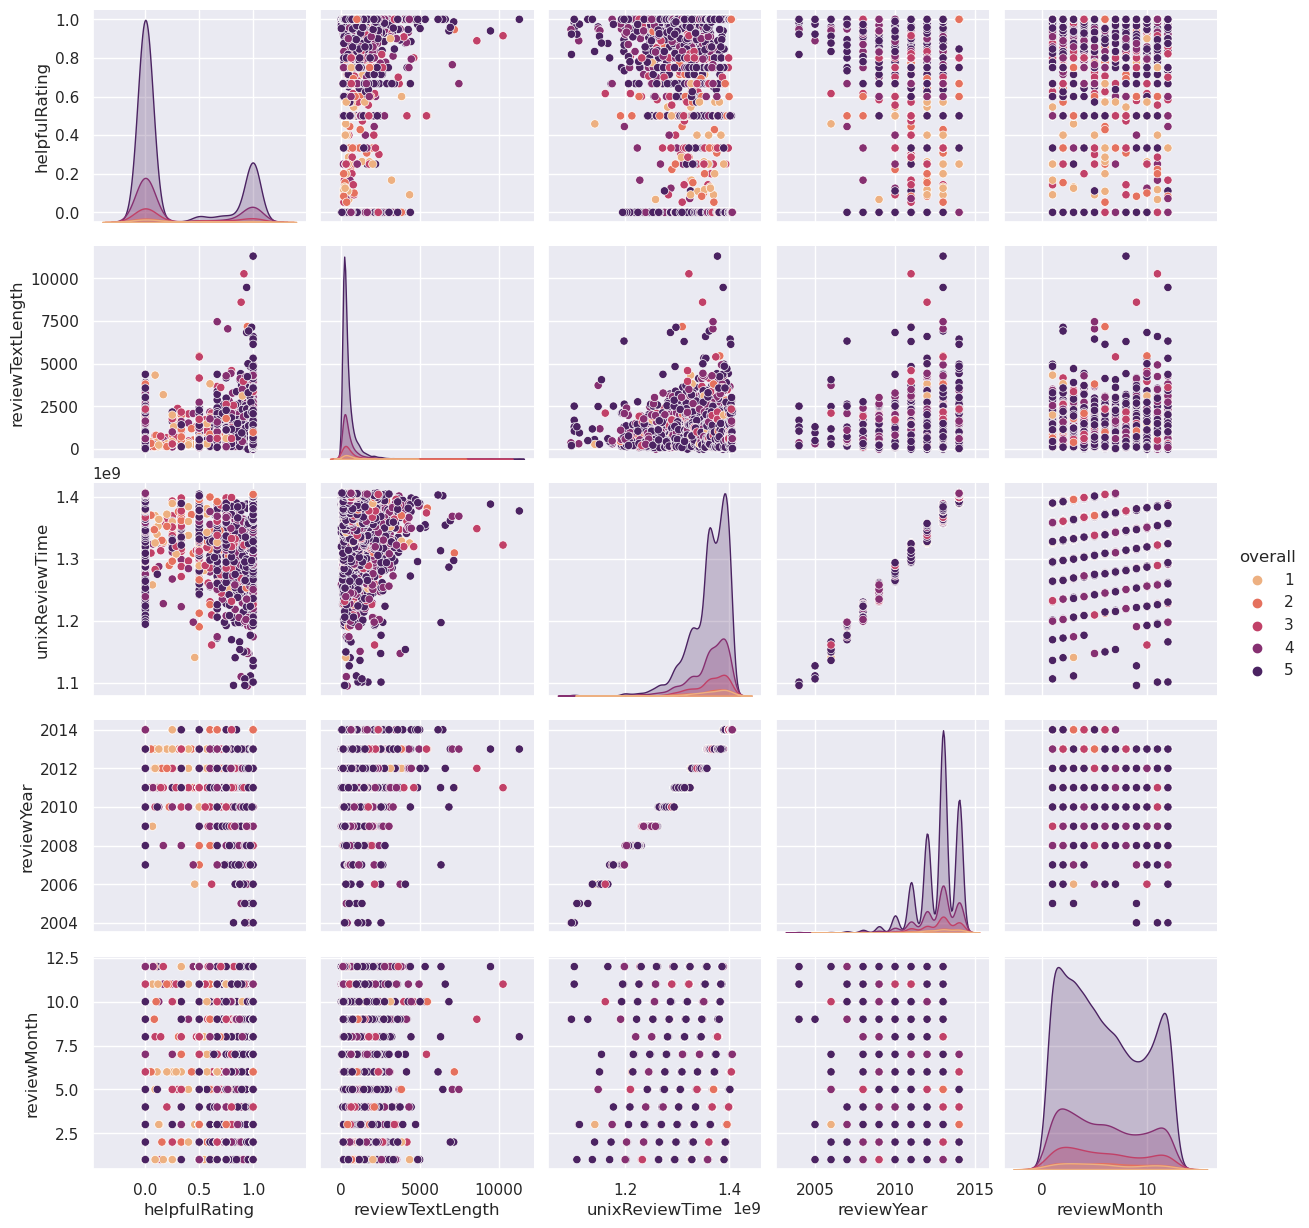

In [13]:
sns.color_palette('flare', as_cmap=True)
sns.set_theme(rc={'figure.figsize':(13,7)})
sns.pairplot(df, hue='overall', palette='flare')

In [14]:
print(f'There are {(df.helpfulRating > 0).sum()} out of {len(df)} ({((df.helpfulRating > 0).sum()/len(df))*100:.1f}%) reviews with a helpful or not-helpful rating.')

There are 3046 out of 10261 (29.7%) reviews with a helpful or not-helpful rating.


Insights: 3046 out of 10261 reviews (29.7%) have helpfulness ratings. Review text length generally less than 5000 characters. More reviews occurred later in the dataset. Review months for the musical instruments generally follow the flow of the holiday buying season. 

In [15]:
df_overall = df['overall'].value_counts(ascending=True).sort_index(ascending=True).rename_axis('review').reset_index(name='reviewcount')
df_overall

,review,reviewcount
0,1,217
1,2,250
2,3,772
3,4,2084
4,5,6938


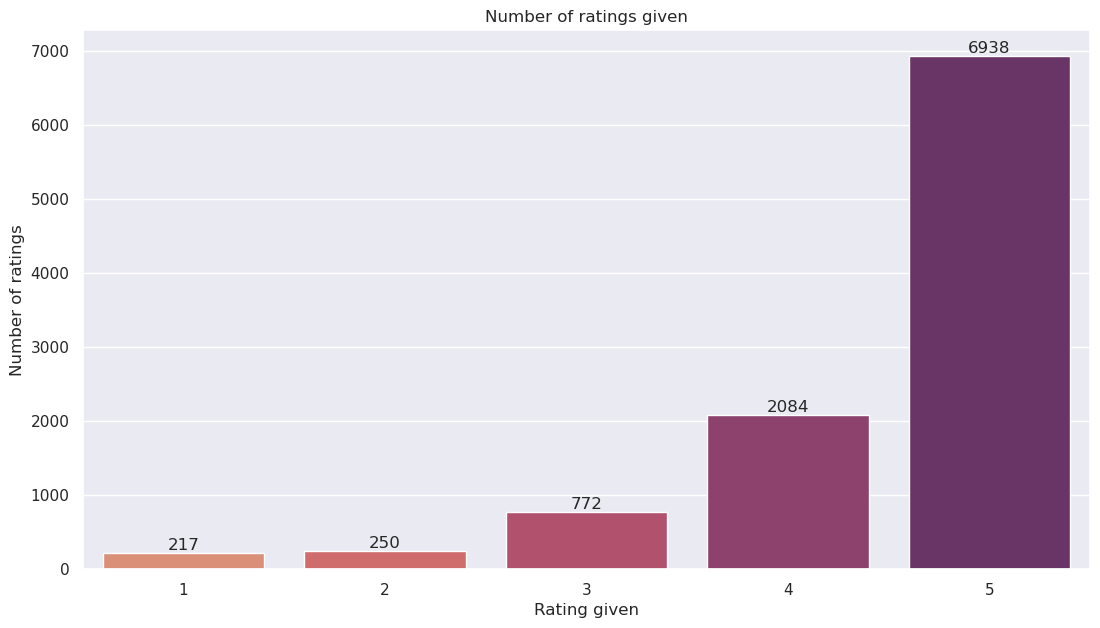

In [16]:
sns.color_palette('flare', as_cmap=True)
ax = sns.barplot(x=df_overall.review, y=df_overall.reviewcount, palette='flare')
ax.set(title='Number of ratings given', xlabel='Rating given', ylabel='Number of ratings')
sns.set_theme(rc={'figure.figsize':(13,7)})   # REF (Seaborn figsize through rc): https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package
for i in ax.containers: ax.bar_label(i,)

Insights: Distributions of ratings from 1 to 5 is left-skewed, no zero-star reviews present. The skewness indicates a general overall 4-to-5-star satisfaction level as 1, 2, and 3 ratings add up to 1239 ratings, while 4's are 2084 and 5's are 6938. 4-ratings are more than 1, 2, and 3 ratings combined. The lowest quantity of review ratings is 1, with 217 ratings. People are generally happy with the musical instruments.

In [17]:
review_min = df_overall.loc[df_overall['reviewcount'].idxmin()]   # REF (min/maxing columns): https://www.tutorialspoint.com/python-pandas-find-the-maximum-value-of-a-column-and-return-its-corresponding-row-values
review_max = df_overall.loc[df_overall['reviewcount'].idxmax()]
print(f'The most popular review rating was "{review_max[0]}", with {review_max[1]} reviews.\nThe least popular review rating was "{review_min[0]}", with {review_min[1]} reviews.')

The most popular review rating was "5", with 6938 reviews.
The least popular review rating was "1", with 217 reviews.


> #### 1c. Distribution of the number of reviews per product

In [18]:
df_asin = df['asin'].value_counts(sort=True).sort_index().rename_axis('asin').reset_index(name='reviewcount')
df_asin

,asin,reviewcount
0,1384719342,5
1,B00004Y2UT,6
2,B00005ML71,5
3,B000068NSX,7
4,B000068NTU,5
...,...,...
895,B00H02C9TG,6
896,B00HFRXACG,11
897,B00IZCSW3M,24
898,B00J4TBMVO,8


In [19]:
df_asin.describe().T

,count,mean,std,min,25%,50%,75%,max
reviewcount,900.0,11.401111,12.933655,5.0,6.0,8.0,12.0,163.0


In [20]:
review_item_max = df_asin.loc[df_asin['reviewcount'].idxmax()]
review_item_min = df_asin.loc[df_asin['reviewcount'].idxmin()]
print(f'The most reviewed item, {review_item_max[0]}, has {review_item_max[1]} reviews.\nThe least reviewed item, {review_item_min[0]}, has {review_item_min[1]} reviews.\nThere are {df_asin.asin.nunique()} unique products reviewed.')

The most reviewed item, B003VWJ2K8, has 163 reviews.
The least reviewed item, 1384719342, has 5 reviews.
There are 900 unique products reviewed.


In [21]:
df_lowest_rated_product = df.loc[df['asin'] == review_item_min[0]]
df_highest_rated_product = df.loc[df['asin'] == review_item_max[0]]
df_lowest_rated_product

,reviewerID,asin,reviewerName,helpful,helpfulRating,reviewText,reviewTextLength,overall,summary,unixReviewTime,reviewTime,reviewYear,reviewMonth
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",0.000000,"Not much to write about here, but it does exac...",268,5,good,1393545600,"02 28, 2014",2014,2
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",0.928571,The product does exactly as it should and is q...,544,5,Jake,1363392000,"03 16, 2013",2013,3
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",1.000000,The primary job of this device is to block the...,436,5,It Does The Job Well,1377648000,"08 28, 2013",2013,8
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",0.000000,Nice windscreen protects my MXL mic and preven...,206,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",2014,2
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",0.000000,This pop filter is great. It looks and perform...,159,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",2014,2


In [22]:
df_highest_rated_product

,reviewerID,asin,reviewerName,helpful,helpfulRating,reviewText,reviewTextLength,overall,summary,unixReviewTime,reviewTime,reviewYear,reviewMonth
8107,A3MONHA5DCPPLZ,B003VWJ2K8,3rdtimer,"[0, 0]",0.0,It works but shut it down as soon as you are f...,211,3,Eats batteries.,1390003200,"01 18, 2014",2014,1
8108,ASYHYW0USZVN6,B003VWJ2K8,aashish,"[0, 0]",0.0,very awesome item. really useful for tuning. h...,108,5,awesome item,1357948800,"01 12, 2013",2013,1
8109,A1RSRUQVKB5EBO,B003VWJ2K8,A F&amp;T,"[1, 1]",1.0,My friend has commented on its bright color - ...,187,5,nice tuner for the $,1322438400,"11 28, 2011",2011,11
8110,A22Z554ZQ8NFPC,B003VWJ2K8,"AF ""Whigs""","[0, 0]",0.0,I have another cheap clip on tuner from guitar...,671,5,Wow! Great tuner!,1299196800,"03 4, 2011",2011,3
8111,A2SBZZ1HSR7WSP,B003VWJ2K8,A. Mayse,"[0, 0]",0.0,the snark series of tuners are the best small ...,317,5,excellent tuner,1324166400,"12 18, 2011",2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,A3BZ9EP6SSC9MU,B003VWJ2K8,Yousif,"[0, 0]",0.0,"Awesome little tuner, very accurate and I can ...",123,5,Very nifty,1361664000,"02 24, 2013",2013,2
8266,A18MMME07XZLYO,B003VWJ2K8,zachary,"[0, 0]",0.0,"this tuner is awsome,it tunes very acurately a...",114,5,works great,1360368000,"02 9, 2013",2013,2
8267,A394SBIRC4A8S9,B003VWJ2K8,zak,"[0, 0]",0.0,I wasn't expecting much as the price was very ...,324,5,Snark SN-1 Tuner,1309478400,"07 1, 2011",2011,7
8268,A2EW01G2LNJN06,B003VWJ2K8,"Z. Mehrbach ""Zach""","[0, 0]",0.0,I haven't had to change the battery on this ba...,183,5,Great life!@,1354665600,"12 5, 2012",2012,12


In [23]:
df_highest_rated_product.overall.value_counts()

5    134
4     18
3      5
1      5
2      1
Name: overall, dtype: int64

> #### 1d. Distribution of reviews per user

In [24]:
df_users = df['reviewerID'].value_counts().keys().tolist()
df_reviews_per_user = df['reviewerID'].value_counts().tolist()
print(f'Users:\tReviews count')
for user in range(len(df_users)):
  print(f'{df_users[user]}:\t{df_reviews_per_user[user]}')

Users:	Reviews count
ADH0O8UVJOT10:	42
A15TYOEWBQYF0X:	38
A1L7M2JXN4EZCR:	38
A2EZWZ8MBEDOLN:	36
A2NYK9KWFMJV4Y:	34
A1SD1C8XK3Z3V1:	32
A1MVH1WLYDHZ49:	32
A1GMWTGXW682GB:	29
A34O0KQV4QXWNQ:	28
A1LQC225SE8UNI:	27
AJK15Q9JOEHRH:	25
A22Z554ZQ8NFPC:	25
A1DVUFG2QSJ6IK:	24
A3M1PLEYNDEYO8:	24
A2F92AOWTIUIB:	23
AKYDGCKCY7H9F:	23
A781ITP3HE2N5:	22
A1EVEQAR05SY7L:	21
A3ITN3125FJETP:	21
A3UXW18DP4WSD6:	21
A1YP96MT6W9FTB:	21
A26SN2CVQM4FKM:	21
A6FIAB28IS79:	21
A2F2L5F9OWWVY6:	20
A3OXHLG6DIBRW8:	20
A31B0LYT2C92SN:	20
A2053ZJUGCKUA5:	20
A37A41GWQFMK3D:	20
A319B090A2POEB:	20
A2CJVLER896Q7L:	19
A1CL807EOUPVP1:	19
A1NAA1R38JSNHV:	19
A1YR3RVSBZK8CW:	19
ALHC64J88LVWO:	19
A2RVY2GDMZHH4:	18
A4BTCECGQAIUI:	18
A1EUO0BU72JR7T:	18
ATJQOAUHB5XB8:	17
AKHWZ3S1UVZAO:	17
A3CSSZ6U5J4YS5:	17
A23AKO4BZLZ8DE:	17
A1MAQQXJZTMSKT:	17
A3AOPVQ7EZHTWA:	17
A306YUQBEB2R9T:	16
A2D0F87RY5YMHN:	16
A2Y8JW5NSY95OL:	16
A1RPTVW5VEOSI:	16
A2SBZZ1HSR7WSP:	16
A3HKZSCGFU9T2A:	16
A1C0O09LOLVI39:	15
A3RDS0DJ5EJGA7:	15
A3EXWV8FNSSFL6:	15
AMP0

In [25]:
print(f'Number of users: {df.reviewerID.nunique()}')

Number of users: 1429


In [26]:
df_reviewid_counts = df['reviewerID'].value_counts().rename_axis('user').reset_index(name='reviewcount')
df_reviewid_counts

,user,reviewcount
0,ADH0O8UVJOT10,42
1,A15TYOEWBQYF0X,38
2,A1L7M2JXN4EZCR,38
3,A2EZWZ8MBEDOLN,36
4,A2NYK9KWFMJV4Y,34
...,...,...
1424,AU9RL6MBM25YY,5
1425,A31997Q9ABEIE9,5
1426,AASCUHX7YUC6M,5
1427,AWQQ1QHCECDJ3,5


> ### Reviewing Text Length of reviews

In [27]:
print(f'The shortest length review is {df.reviewTextLength.min()} characters. The longest length review is {df.reviewTextLength.max()} characters.')
print(f'The mean number of characters in review text length is {df.reviewTextLength.mean():.1f} characters.')

The shortest length review is 0 characters. The longest length review is 11310 characters.
The mean number of characters in review text length is 485.9 characters.


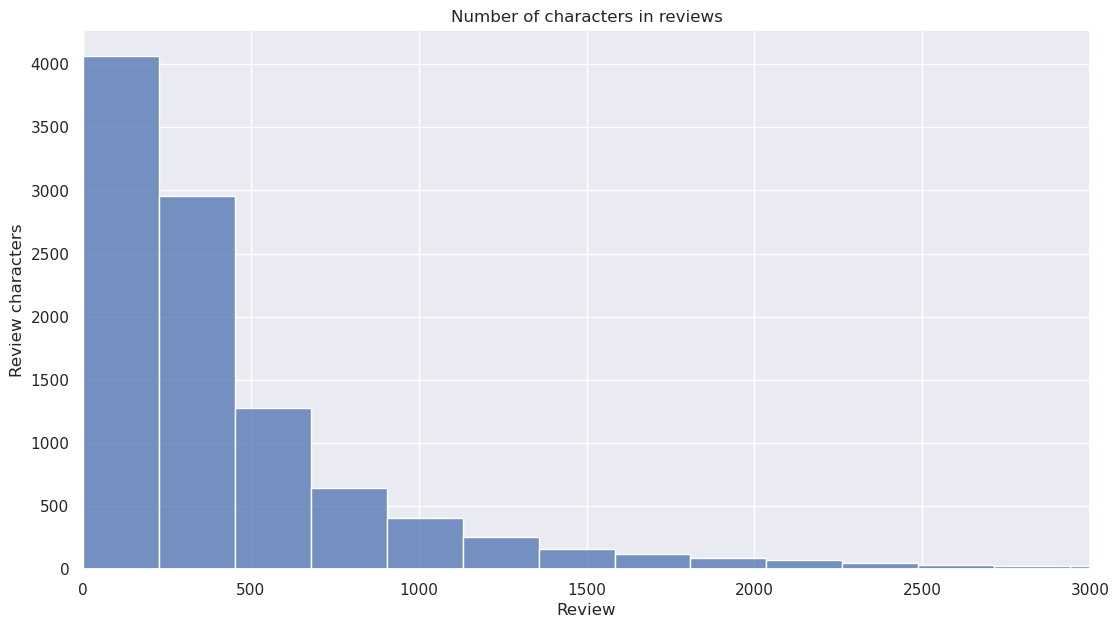

In [28]:
ax = sns.histplot(data=df.reviewTextLength, bins=50)
ax.set(title='Number of characters in reviews', xlabel='Review', ylabel='Review characters', xlim=(0,3000))
ax = sns.set_theme(rc={'figure.figsize':(11,7)})

In [29]:
df.reviewTextLength.describe()

count    10261.000000
mean       485.929052
std        613.436113
min          0.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: reviewTextLength, dtype: float64

In [30]:
print(f'Sample text #10000: {df["reviewText"].iloc[10000]}')

Sample text #10000: Small footprint, simple to use, one button, one knob and does not suck tone out of my guitar. It's only got a basic feature set but that's all I need. Reasonable price too. Highly recommended.


In [31]:
print(f'Sample text #106: {df["reviewText"].iloc[106]}')

Sample text #106: Great stereo sound out of the keyboards.My keys had a single 1/4&#34; stereo out so this cable was needed to get it to convert to a true 2 channel stereo so we could EQ it properly and it worked like a charm. I highly recommend this cable.


In [32]:
print(f'Sample text #256: {df["reviewText"].iloc[256]}')

Sample text #256: The Beta 58A along with the original SM58 are industry standards, that's well known. As a general purpose workhorse for live vocals they are by far the most popular tools out there. Quality venues throughout the country commonly stock these as their go-to house mics. In fact, I noticed Betas all over the place at a small theater (with a high-end system) that I played at just recently.I had used the old 58 for years before moving to the Beta and there is certainly a noticeable difference between the two. The Beta is definitetly hotter, with a more sensitive response. Your vocals will cut into the mix strongly and with more clarity than you might be used to. Mids and highs are picked up perfectly when singing a few inches away and there is a subtle low frequency roll-off to avoid that boomy, muddled sound you typically get when hitting low or quiet notes up close. You definitely need to stay within a close range though as the pickup pattern is very tight. This is a good

In [33]:
print(f'Long reviews, with 9000 characters or more:')
df[df.reviewTextLength >= 9000]

Long reviews, with 9000 characters or more:


,reviewerID,asin,reviewerName,helpful,helpfulRating,reviewText,reviewTextLength,overall,summary,unixReviewTime,reviewTime,reviewYear,reviewMonth
3613,A3H4S6YO9VNGDZ,B0006H92QK,Anthony J.,"[47, 50]",0.940000,I've been recording professionally for 27 year...,9477,5,I'm Here To Help,1388016000,"12 26, 2013",2013,12
6576,A20JJ8634DG3FS,B001I8ITQA,"Johnny Guitar ""J.F. Guitar""","[10, 10]",1.000000,"COMPARISONS: I have compared, side by side, th...",11310,5,a GREAT choice for a univibe pedal,1377043200,"08 21, 2013",2013,8
9355,ACY9QYNDFLVBI,B005OZE9SA,G. Farnsworth,"[129, 141]",0.914894,I use this little guy in connection with my DA...,10275,3,Excellent hardware--Horrible driver,1322179200,"11 25, 2011",2011,11


In [34]:
print(f'Statistics about the most helpful comments:')
df[df.helpfulRating >= 0.75].describe()

Statistics about the most helpful comments:


,helpfulRating,reviewTextLength,overall,unixReviewTime,reviewYear,reviewMonth
count,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000
mean,0.973275,793.144641,4.503626,1.338937e+09,2011.954069,6.232474
std,0.066324,929.785180,0.859887,4.745142e+07,1.553138,3.722588
min,0.750000,0.000000,1.000000,1.095466e+09,2004.000000,1.000000
25%,1.000000,250.000000,4.000000,1.314770e+09,2011.000000,3.000000
50%,1.000000,486.000000,5.000000,1.349093e+09,2012.000000,6.000000
75%,1.000000,988.000000,5.000000,1.375056e+09,2013.000000,10.000000
max,1.000000,11310.000000,5.000000,1.405123e+09,2014.000000,12.000000


In [35]:
print(f'Statistics about ratings without text:')
df[df.reviewTextLength == 0].describe()

Statistics about ratings without text:


,helpfulRating,reviewTextLength,overall,unixReviewTime,reviewYear,reviewMonth
count,7.000000,7.0,7.000000,7.000000e+00,7.000000,7.000000
mean,0.981059,0.0,4.857143,1.341261e+09,2011.714286,9.857143
std,0.020117,0.0,0.377964,4.424145e+07,1.380131,2.115701
min,0.952381,0.0,4.000000,1.258416e+09,2009.000000,7.000000
25%,0.965327,0.0,5.000000,1.331035e+09,2011.500000,8.500000
50%,0.984375,0.0,5.000000,1.342656e+09,2012.000000,10.000000
75%,1.000000,0.0,5.000000,1.368792e+09,2012.500000,11.500000
max,1.000000,0.0,5.000000,1.388102e+09,2013.000000,12.000000


> ## Part 2: Text basic pre-processing

In [36]:
df_1000 = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(n=200, random_state=random_state))
df_1000['overall'].value_counts()

1    200
2    200
3    200
4    200
5    200
Name: overall, dtype: int64

### b. Label your data based on the value of “rating of the product” i.e. as follows:
#### i. Ratings 4,5: Positive
#### ii. Rating 3: Neutral
#### iii. Ratings 1,2: Negative

In [37]:
def apply_product_ratings(line):
  if line.overall >= 4:
    line['overallRating'] = 'Positive'
  elif line.overall == 3:
    line['overallRating'] = 'Neutral'
  elif line.overall < 3:
    line['overallRating'] = 'Negative'
  return line

df_1000 = df_1000.apply(apply_product_ratings, axis=1)
df_1000.overallRating.value_counts()

Negative    400
Positive    400
Neutral     200
Name: overallRating, dtype: int64

Insights: Assignment asks for a sample of 500-1000 reviews, using overall rating value (1-5), this code produces a dataset of 1000 reviews, which is 200 reviews per rating value, reproducable, by using random_state. This works well as each review rating has more than 200 reviews, the lowest number of review value is a value of 1 which has 217 reviews. 400 reviews are positive, 400 negative, and 200 are neutral.

In [38]:
df_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4224 to 9498
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewerID        1000 non-null   object 
 1   asin              1000 non-null   object 
 2   reviewerName      998 non-null    object 
 3   helpful           1000 non-null   object 
 4   helpfulRating     1000 non-null   float64
 5   reviewText        1000 non-null   object 
 6   reviewTextLength  1000 non-null   int64  
 7   overall           1000 non-null   int64  
 8   summary           1000 non-null   object 
 9   unixReviewTime    1000 non-null   int64  
 10  reviewTime        1000 non-null   object 
 11  reviewYear        1000 non-null   int64  
 12  reviewMonth       1000 non-null   int64  
 13  overallRating     1000 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 117.2+ KB


In [39]:
df_1000.drop(['reviewerName', 'helpful', 'helpfulRating', 'reviewTextLength', 'unixReviewTime', 'reviewTime', 'reviewYear', 'reviewMonth'], axis=1, inplace=True)
df_1000.head()

,reviewerID,asin,reviewText,overall,summary,overallRating
4224,AKGWRO6IC0VIE,B000B6DHB2,I wanted to like this. I really did. The idea ...,1,Bummer,Negative
2964,A3FBE4WF5KQRR1,B0002H0SKS,I thought something was drastically wrong with...,1,Junk,Negative
3090,A3VIIH9ZNJ823H,B0002KYXTM,I purchased this as an extra CV controller for...,1,Forget it unless you are flat broke.,Negative
8555,AXMYGK3WC8BPP,B004FEGXDK,"Really wanted to like this one, because I love...",1,"Not true bypass, colors tone/breaks easily.",Negative
8553,A3CNFMV0IISC3C,B004FEGXDK,"A dull, inept version of a TubeScreamer. Just ...",1,Dull,Negative


Insights: Removed the following columns:

- reviewerName: this column has 27 missing values, as well the names of reviewers is not helpful in predicting sentiment or in machine learning.
- helpful: not needed in NLP analysis, contains the helpfulness of the review.
- reviewTextLength: not needed for sentiment analysis, was created for other analysis in step 1.
- unixReviewTime, reviewTime, reviewYear, reviewMonth: contains time information, and while useful in dataset exploration, but is not required for lexicon approaches as it is rule-based and does not have connections with data and time for sentiment analysis. Not useful in the machine learning approach either.

In [40]:
df_1000.reviewText = df_1000.reviewText.str.lower()   # Lowercase
df_1000.reviewText = df_1000.reviewText.str.replace('[^\w\s]','', regex=True)   # Remove punctuation
df_1000.head()

,reviewerID,asin,reviewText,overall,summary,overallRating
4224,AKGWRO6IC0VIE,B000B6DHB2,i wanted to like this i really did the idea of...,1,Bummer,Negative
2964,A3FBE4WF5KQRR1,B0002H0SKS,i thought something was drastically wrong with...,1,Junk,Negative
3090,A3VIIH9ZNJ823H,B0002KYXTM,i purchased this as an extra cv controller for...,1,Forget it unless you are flat broke.,Negative
8555,AXMYGK3WC8BPP,B004FEGXDK,really wanted to like this one because i loved...,1,"Not true bypass, colors tone/breaks easily.",Negative
8553,A3CNFMV0IISC3C,B004FEGXDK,a dull inept version of a tubescreamer just so...,1,Dull,Negative


In [41]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)   # Show the entire review for clarity
df_1000[['reviewText']].head(9)

,reviewText
4224,i wanted to like this i really did the idea of an amp this portable and cheap just made me think 34perfect34 however the unit i received was crp and im going to assume it was defective and not blanket all the positive reviews with dispersions the one i got kept cutting in and out you might be playing a solo line and you might hear about 75 of the notes or something and when holding a chord the sustained sound would cut out after a few seconds frustratingi did weigh whether or not to try a replacement unit the soso sound and overall quality however didnt compel me to give it another go bummer any suggestions for an amp of similar size and portabilitycheers
2964,i thought something was drastically wrong with my guitar but it was these strings they buzzed and move so much they hit every metal on every fret
3090,i purchased this as an extra cv controller for a digitech control 2 when i got it i tried it out as a volume pedal just for kicks and yes it does suck the tone right out of the signal as far as a cv controler it sucks at that too why it squeaks as you move it after 5 minutes use right out of the box behringer is a joke and gives german engineering a bad name although only conceived in germanyits a direct copy of the yamaha fc9 and so i am about to purchase one of those and see how it compares im betting the extra 45 dollars will be well worth italso you may say who cares if it squeaks a little well i do when i am controlling volume swells or a wah effect at low volume in the studiogood luck if you buy it
8555,really wanted to like this one because i loved the price there is no way this is true bypass the one i got was defective out of the box and so when i checked i saw the circuitry did not support pass through maybe it is because i received a defective one but i still wouldnt try this brand name i am now stuck saving up for a full tone or something
8553,a dull inept version of a tubescreamer just sounds flat and boring not very inspiring at all then again i never did really like tss
2424,the cable died on me in less than a month very disappointed in built quality
9549,the adjustment screw for the boom is a piece of crap a really small set screw that strips out almost immediately replace that with something stronger and this would be a great stand they are light weight and if all you need is mic support in a fixed setting good enuf okay i guess but after transporting and reset i found them to be junk
1747,i bought this hoping to use as intended angled into guitar straight into mixer wrong have to use it the other way around sad
4928,behringer pedals are really cheaply made and the feel amazingly light cheap and unable to take the riggors of gigging i just didnt want to spend 100 on the boss version but you get what you pay for another thing that i hate is its really hard to change the battery unlike the boss pedals save your money and steer clear of this one i also bought a behringer power amp for 200 that lasted a few gigs befor it crapped out


Lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [42]:
import nltk
from nltk.stem import WordNetLemmatizer

In [43]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [44]:
nltk.download('wordnet')
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/   # REF (nltk on Kaggle): https://www.kaggle.com/discussions/general/395169
# REF (force overwrite on Kaggle): https://www.kaggle.com/questions-and-answers/109111

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/co

In [45]:
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
df_1000['reviewText'] = df_1000['reviewText'].apply(lambda line: ' '.join([lemmatizer.lemmatize(word) for word in line.split()]))
df_1000.head()

,reviewerID,asin,reviewText,overall,summary,overallRating
4224,AKGWRO6IC0VIE,B000B6DHB2,i wanted to like this i really did the idea of an amp this portable and cheap just made me think 34perfect34 however the unit i received wa crp and im going to assume it wa defective and not blanket all the positive review with dispersion the one i got kept cutting in and out you might be playing a solo line and you might hear about 75 of the note or something and when holding a chord the sustained sound would cut out after a few second frustratingi did weigh whether or not to try a replacement unit the soso sound and overall quality however didnt compel me to give it another go bummer any suggestion for an amp of similar size and portabilitycheers,1,Bummer,Negative
2964,A3FBE4WF5KQRR1,B0002H0SKS,i thought something wa drastically wrong with my guitar but it wa these string they buzzed and move so much they hit every metal on every fret,1,Junk,Negative
3090,A3VIIH9ZNJ823H,B0002KYXTM,i purchased this a an extra cv controller for a digitech control 2 when i got it i tried it out a a volume pedal just for kick and yes it doe suck the tone right out of the signal a far a a cv controler it suck at that too why it squeak a you move it after 5 minute use right out of the box behringer is a joke and give german engineering a bad name although only conceived in germanyits a direct copy of the yamaha fc9 and so i am about to purchase one of those and see how it compare im betting the extra 45 dollar will be well worth italso you may say who care if it squeak a little well i do when i am controlling volume swell or a wah effect at low volume in the studiogood luck if you buy it,1,Forget it unless you are flat broke.,Negative
8555,AXMYGK3WC8BPP,B004FEGXDK,really wanted to like this one because i loved the price there is no way this is true bypass the one i got wa defective out of the box and so when i checked i saw the circuitry did not support pas through maybe it is because i received a defective one but i still wouldnt try this brand name i am now stuck saving up for a full tone or something,1,"Not true bypass, colors tone/breaks easily.",Negative
8553,A3CNFMV0IISC3C,B004FEGXDK,a dull inept version of a tubescreamer just sound flat and boring not very inspiring at all then again i never did really like tss,1,Dull,Negative


Insights: data clean-up
* Lowercasing: decreases the unique words in the corpus, giving an increase in efficiency. The same words with variation in case have the same or almost exact same meaning regardless of case, AI benefits from this efficiency.
* Punctuation removal: not required in sentiment analysis, can be easily removed for efficiency.
* Lemmatization: converts conjugated or other forms of a word into the base word, increases model understanding and decreases size of corpus, therefore increases efficiency. 

In [46]:
from sklearn.utils import shuffle
df1000 = shuffle(df_1000, random_state=random_state)   # Shuffle the 1000 reviews in repeatable way

> #### Create training and testing datasets

In [47]:
x = df_1000.iloc[:,:-1]
y = df_1000.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=random_state)

In [48]:
y_train.value_counts()

Positive    280
Negative    280
Neutral     140
Name: overallRating, dtype: int64

In [49]:
y_test.value_counts()

Negative    120
Positive    120
Neutral      60
Name: overallRating, dtype: int64

In [50]:
df_1000.overallRating.value_counts()

Negative    400
Positive    400
Neutral     200
Name: overallRating, dtype: int64

Insights: after spliting the dataset into x and y, then train and test datasets in a 70/30 split, stratified on the rating value, using the random_state for repeatibility, both train and test datasets contain respectable amounts of data for their purposes, considering the original 1000-review dataset.

In [51]:
x_train.head()

,reviewerID,asin,reviewText,overall,summary
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year"
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China
3343,A24VMSBJAWFRCP,B0002M728Y,throw this bad boy in anything and it will make a world of difference particularly if the tube being replaced wa a cheap tube,5,A perfect replacement!
7297,A2VWNZNFV8QCP0,B002GYWBKU,before i purchased the fbv i scoured the web to see how it work with the pod hd desktop and even the advanced user guide leaf you thinkinganyway i lucked out and found a used one going cheap and after some time figured out exactly what you can and cannot do with the pod hd desktop fbv express ii combo1 first in the setup screen do not enable the fbv express yes i know this sound dumb but internet scouring show there is a bug that this is a workaround for2 read the fbv express user guide and calibrate the pedal there is no need to dl the fbv software for thisnow in the pod setup screen you have the option to either have the abcd button a abcd or to be fs5fs8 this behavior is mimicked by the 4 switch on the fbvso in abcd mode you cana select preset a b c or d from the group you are currently inb insert a volume fx and use volume pedalexp2c insert another fx enabled by toe switch and controlled by pedal a exp1d tap temp by tapping the currently selected presetie the pedal that is lite enable the tuner presshold the current selected preset pedalf you have some basic control of the looper but cannot enable it31014 edit looper control is flawed you can record and go to overdub but you cannot record then playstop the loop you can stop from overdub but no

> ### 3. Text representation: Represent your text using one of the approaches explained in module #2. Justify why you chose that approach

TF/IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer   # CountVectorizer and TfidfTransformer for Q13 at the end
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(x_train.reviewText)   # Build the TF-IDF matrix
tfidf_matrix.shape

(700, 6291)

In [53]:
tfidf_test = tfidf.transform(x_test.reviewText)
tfidf_test.shape

(300, 6291)

Insights: TF-IDF (Term-Frequency-Inverse-Document-Frequency) represents the text corpus in numerical, matrix format, columns are unique words, rows are text of all instances. TF looks at the number of occurrences of a term within the document, IDF looks at the commonness within the corpus. TF-IDF does not understand context, but bag-of-words does.

Bag-Of-Words: sklearn CountVectorizer

In [54]:
countvectorizer = CountVectorizer()   # REF (sklearn bag-of-words): https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/
countvectorizer_data = countvectorizer.fit_transform(x_train.reviewText)
countvectorizer_data.shape

(700, 6291)

Gensim Word2Vec

In [55]:
from nltk.tokenize import sent_tokenize, word_tokenize
corpus_text = 'n'.join(x_train.reviewText)
data_word2vec = []

for i in sent_tokenize(corpus_text):   # iterate through each sentence in the file
  temp = []
  
  for j in word_tokenize(i):   # tokenize the sentence into words
    temp.append(j.lower())
  data_word2vec.append(temp)

In [56]:
from gensim.models import Word2Vec
try:
  word2vec_model1 = Word2Vec(sentences=data_word2vec, vector_size=100, window=5, min_count=1, sg=0)   # REF (word2vec): https://radimrehurek.com/gensim/models/word2vec.html
  word2vec_model2 = Word2Vec(sentences=data_word2vec, vector_size=100, window=5, min_count=1, sg=1)
  print(f'Word2Vec models generated.')
except (KeyError, TypeError) as e:
  print(f'Error detected: {e}')

Word2Vec models generated.


Distributed representation using spaCy

In [57]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 32.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [58]:
import spacy, string, re
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_md')   # REF (Pretrained medium model): https://spacy.io/models
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
def review_vectorization(review_text):
  # Lowercase -> remove punctuation -> remove digits -> remove whitespace
  review_text = review_text.lower()
  review_text = review_text.translate(str.maketrans('','', string.punctuation))#replace('[^\w\s]','', regex=True)
  review_text = re.sub(r'\d+','',review_text)
  review_text = review_text.strip()

  # Tokenisation, remove stop words in the process
  review_text_tokenized = word_tokenize(review_text)
  review_text_tokenized_no_stopwords = [word for word in review_text_tokenized if not word in stop_words]
  review_text = ' '.join(review_text_tokenized_no_stopwords)

  # Return the spaCy's output of the review text
  return nlp(review_text)

In [60]:
# Apply review_vectorization and place into a new column
x_train['reviewVectorized'] = x_train.reviewText.apply(review_vectorization)
x_test['reviewVectorized'] = x_test.reviewText.apply(review_vectorization)
x_train.head(5)

,reviewerID,asin,reviewText,overall,summary,reviewVectorized
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul,"(tried, type, string, p, epiphone, le, paul, find, ernie, ball, power, slinky, lot, power, punch, advertised, give, nice, tone, wa, looking, power, thick, sound, due, string, heavier, gauge, string, usually, come, guitar, take, little, finger, strength, play, worth, getting, used, string, work, well, many, different, type, rock, play, work, even, fine, drop, c, tuning, also, durable, string, get, lose, tone, quite, time, prefer, power, slinkys, daddario, xl, regular, slinky, used, like, tried, even, prefer, expensive, full, nickel, rock, n, roll, slinky, surprisingly, sounded, boring, compared, energy, power, slinkys, give, would, say, power, slinkys, give, sufficiently, bright, sound, excessively, bright, would, ...)"
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year","(careful, small, recording, studio, put, cable, lot, guy, do, nt, last, fine, first, month, started, die, like, murder, mystery, seriously, one, another, would, go, apparent, reasonfine, one, second, would, go, horribly, staticky, actually, two, blow, one, time, thought, pa, wa, shot, thankfully, wa, cable, good, spend, little, extra, another, brand, favoritegls, audio, ft, cable, cord)"
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China,"(went, budget, pricing, without, going, absolute, cheapestusing, audio, acquisition, film, video, purposepleasantly, surprised, construction, quality, cable, considering, made, china, well, see, hold, timeso, far, clean, sound, using, shotgun, mic, straight, zoom, h, recordermy, gripe, rubber, grommet, metal, connector, cable, wa, obvious

In [61]:
print(f'x_train columns: {list(x_train.columns.values)}')

x_train columns: ['reviewerID', 'asin', 'reviewText', 'overall', 'summary', 'reviewVectorized']


> ## Part 4: Modeling (Sentiment Analysis) Lexicon approach

4ai: Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find out more information here: https://github.com/cjhutto/vaderSentiment

Note: may need to install re instructions webpage: pip install vaderSentiment   and   pip install --upgrade vaderSentiment

In [62]:
nltk.download('twython')   # For Kaggle compatibility
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimentintensityanalyzer = SentimentIntensityAnalyzer()    # REF (Good ol' towardsdatascience.com, sentiment analysis): https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

[nltk_data] Error loading twython: Package 'twython' not found in
[nltk_data]     index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [63]:
x_train['vadrScores'] = x_train['reviewText'].apply(lambda reviewText: sentimentintensityanalyzer.polarity_scores(reviewText))
x_train.head(3)

,reviewerID,asin,reviewText,overall,summary,reviewVectorized,vadrScores
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul,"(tried, type, string, p, epiphone, le, paul, find, ernie, ball, power, slinky, lot, power, punch, advertised, give, nice, tone, wa, looking, power, thick, sound, due, string, heavier, gauge, string, usually, come, guitar, take, little, finger, strength, play, worth, getting, used, string, work, well, many, different, type, rock, play, work, even, fine, drop, c, tuning, also, durable, string, get, lose, tone, quite, time, prefer, power, slinkys, daddario, xl, regular, slinky, used, like, tried, even, prefer, expensive, full, nickel, rock, n, roll, slinky, surprisingly, sounded, boring, compared, energy, power, slinkys, give, would, say, power, slinkys, give, sufficiently, bright, sound, excessively, bright, would, ...)","{'neg': 0.026, 'neu': 0.785, 'pos': 0.189, 'compound': 0.985}"
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year","(careful, small, recording, studio, put, cable, lot, guy, do, nt, last, fine, first, month, started, die, like, murder, mystery, seriously, one, another, would, go, apparent, reasonfine, one, second, would, go, horribly, staticky, actually, two, blow, one, time, thought, pa, wa, shot, thankfully, wa, cable, good, spend, little, extra, another, brand, favoritegls, audio, ft, cable, cord)","{'neg': 0.207, 'neu': 0.711, 'pos': 0.082, 'compound': -0.9572}"
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China,"(went, budget, pricing, without, going, absolute, cheapestusing, audio, acquisition, film, video, purposepleasantly, surprised, construction, quality, cable, considering, made, china, well, see, hold

In [64]:
x_train['compound'] = x_train['vadrScores'].apply(lambda score_dict: score_dict['compound'])   # score_dict really doesn't like 'vadrCompound' so rename after the operation
x_train['vadrSentiment'] = ''
x_train.loc[x_train['compound'] > 0,'vadrSentiment'] = 'Positive'
x_train.loc[x_train['compound'] < 0,'vadrSentiment'] = 'Negative'
x_train.loc[x_train['compound'] == 0,'vadrSentiment'] = 'Neutral'
x_train.rename(columns={'compound':'vadrCompound'}, inplace=True)
x_train.head(3)

,reviewerID,asin,reviewText,overall,summary,reviewVectorized,vadrScores,vadrCompound,vadrSentiment
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul,"(tried, type, string, p, epiphone, le, paul, find, ernie, ball, power, slinky, lot, power, punch, advertised, give, nice, tone, wa, looking, power, thick, sound, due, string, heavier, gauge, string, usually, come, guitar, take, little, finger, strength, play, worth, getting, used, string, work, well, many, different, type, rock, play, work, even, fine, drop, c, tuning, also, durable, string, get, lose, tone, quite, time, prefer, power, slinkys, daddario, xl, regular, slinky, used, like, tried, even, prefer, expensive, full, nickel, rock, n, roll, slinky, surprisingly, sounded, boring, compared, energy, power, slinkys, give, would, say, power, slinkys, give, sufficiently, bright, sound, excessively, bright, would, ...)","{'neg': 0.026, 'neu': 0.785, 'pos': 0.189, 'compound': 0.985}",0.9850,Positive
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year","(careful, small, recording, studio, put, cable, lot, guy, do, nt, last, fine, first, month, started, die, like, murder, mystery, seriously, one, another, would, go, apparent, reasonfine, one, second, would, go, horribly, staticky, actually, two, blow, one, time, thought, pa, wa, shot, thankfully, wa, cable, good, spend, little, extra, another, brand, favoritegls, audio, ft, cable, cord)","{'neg': 0.207, 'neu': 0.711, 'pos': 0.082, 'compound': -0.9572}",-0.9572,Negative
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China,"(went, budget, pricing, without, going, absolute, cheapestusing, audio, acquisition, film, video, purposepleasantly, surprised, constructio

In [65]:
# Calculate the scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
vadr_accuracy = accuracy_score(x_train['vadrSentiment'], y_train)
vadr_precision = precision_score(x_train['vadrSentiment'], y_train, average='macro')   # REF (averaging): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
vadr_recall = recall_score(x_train['vadrSentiment'], y_train, average='micro')
vadr_f1 = f1_score(x_train['vadrSentiment'], y_train, average='macro')

# Resultant scores
print(f'Valence Aware Dictionary and Sentiment Reasoner (VADR) modelling\nAccuracy: {vadr_accuracy:.5f}\nPrecision: {vadr_precision:.5f}\nRecall: {vadr_recall:.5f}\nF1: {vadr_f1:.5f}')

Valence Aware Dictionary and Sentiment Reasoner (VADR) modelling
Accuracy: 0.52857
Precision: 0.44286
Recall: 0.52857
F1: 0.39187


SENTIWORDNET you can find more information here: http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf

In [66]:
print(f'x_train columns: {list(x_train.columns.values)}')

x_train columns: ['reviewerID', 'asin', 'reviewText', 'overall', 'summary', 'reviewVectorized', 'vadrScores', 'vadrCompound', 'vadrSentiment']


In [67]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [68]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
import numpy as np

# Helper function to remap nltk tags to wordnet tags
def spacy_to_wordnet_tag(tag):
  if tag == 'ADJ':
    return wn.ADJ
  elif tag == 'NOUN':
    return wn.NOUN
  elif tag == 'ADV':
    return wn.ADV
  elif tag == 'VERB':
    return wn.VERB
  return None

def sentiment_scorer(review_vector):
  positive_word_scores, negative_word_scores = [], []
  lemmatizer = WordNetLemmatizer()

  tagged_text = [(token.text, token.pos_) for token in review_vector]

  for word, tag in tagged_text:
    # Convert spacy to wordnet tagging -> check if tag isn't Noun, adjective, or adverb -> if not wordnet lemmatise -> check if not synsets -> try scoring -> add positive and negative scores -> return 
    wn_tag = spacy_to_wordnet_tag(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn. ADV):   # If the wordnet noun, adjective, adverb, carry on 
      continue

    wn_lem = lemmatizer.lemmatize(word, pos=wn_tag)
    if not wn_lem:
      continue

    wn_synsets = wn.synsets(word, pos=wn_tag)   # REF (synsets ref): https://www.nltk.org/howto/wordnet.html
    if not wn_synsets:
      continue

    # Use the part of speech (pos) and sentiwordnet/senti_synset to determine scoring
    try:
      if wn_tag == wn.NOUN:
        pos = swn.senti_synset(str(wn_lem)+'.n.01')
        positive_word_scores.append(pos.pos_score())   # REF (Scoring and senti_synset): https://www.nltk.org/_modules/nltk/corpus/reader/sentiwordnet.html
        negative_word_scores.append(pos.neg_score())
      elif wn_tag == wn.ADJ:
        pos = swn.senti_synset(str(wn_lem)+'.a.01')
        positive_word_scores.append(pos.pos_score())
        negative_word_scores.append(pos.neg_score())
      elif wn_tag == wn.ADV:
        pos = swn.senti_synset(str(wn_lem)+'.r.01')
        positive_word_scores.append(pos.pos_score())
        negative_word_scores.append(pos.neg_score())
      elif wn_tag == wn.VERB:
        pos = swn.senti_synset(str(wn_lem)+'.v.01')
        positive_word_scores.append(pos.pos_score())
        negative_word_scores.append(pos.neg_score())
    except:
      pass

    positive_word_scores_sum = np.sum(positive_word_scores)
    negative_word_scores_sum = np.sum(negative_word_scores)

    swn_sentiment = positive_word_scores_sum - negative_word_scores_sum   # For some reason my runtime doesn't like: return positive_word_scores_sum - negative_word_scores_sum oh well this works 

    return swn_sentiment

In [69]:
x_train['swnSentimentScore'] = x_train['reviewVectorized'].apply(sentiment_scorer)
x_train.head(3)
x_train['swnSentimentScore'].value_counts()

 0.000    444
 0.125     47
 0.750     31
 0.625     26
-0.250     26
 0.375     22
-0.125     20
 0.250     16
 0.875     16
 0.500     14
-0.625     11
-0.500     11
-0.375      9
-0.750      3
-0.875      1
 1.000      1
Name: swnSentimentScore, dtype: int64

In [70]:
x_train['swnSentimentScore'].value_counts()

 0.000    444
 0.125     47
 0.750     31
 0.625     26
-0.250     26
 0.375     22
-0.125     20
 0.250     16
 0.875     16
 0.500     14
-0.625     11
-0.500     11
-0.375      9
-0.750      3
-0.875      1
 1.000      1
Name: swnSentimentScore, dtype: int64

In [71]:
x_train.head(9)

,reviewerID,asin,reviewText,overall,summary,reviewVectorized,vadrScores,vadrCompound,vadrSentiment,swnSentimentScore
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul,"(tried, type, string, p, epiphone, le, paul, find, ernie, ball, power, slinky, lot, power, punch, advertised, give, nice, tone, wa, looking, power, thick, sound, due, string, heavier, gauge, string, usually, come, guitar, take, little, finger, strength, play, worth, getting, used, string, work, well, many, different, type, rock, play, work, even, fine, drop, c, tuning, also, durable, string, get, lose, tone, quite, time, prefer, power, slinkys, daddario, xl, regular, slinky, used, like, tried, even, prefer, expensive, full, nickel, rock, n, roll, slinky, surprisingly, sounded, boring, compared, energy, power, slinkys, give, would, say, power, slinkys, give, sufficiently, bright, sound, excessively, bright, would, ...)","{'neg': 0.026, 'neu': 0.785, 'pos': 0.189, 'compound': 0.985}",0.9850,Positive,0.000
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year","(careful, small, recording, studio, put, cable, lot, guy, do, nt, last, fine, first, month, started, die, like, murder, mystery, seriously, one, another, would, go, apparent, reasonfine, one, second, would, go, horribly, staticky, actually, two, blow, one, time, thought, pa, wa, shot, thankfully, wa, cable, good, spend, little, extra, another, brand, favoritegls, audio, ft, cable, cord)","{'neg': 0.207, 'neu': 0.711, 'pos': 0.082, 'compound': -0.9572}",-0.9572,Negative,0.500
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China,"(went, budget, pricing, without, going, absolute, cheapestusing, audio, acquisition, film, video, purposeplea

In [72]:
def sentimenter(sentiment_score):
  if sentiment_score > 0:
    return 'Positive'
  elif sentiment_score < 0:
    return 'Negative'
  else:
    return 'Neutral'

In [73]:
x_train['swnSentiment'] = x_train['swnSentimentScore'].apply(sentimenter)
print(f'x_train sentiments:\n{x_train.swnSentiment.value_counts()}')

x_train sentiments:
Neutral     446
Positive    173
Negative     81
Name: swnSentiment, dtype: int64


In [74]:
print(f'x_train shape: {x_train.shape}')
print(f'x_train value counts\n{x_train.swnSentiment.value_counts()}\n')
print(f'y_train shape: {y_train.shape}')
print(f'y_train value counts\n{y_train.value_counts()}')

x_train shape: (700, 11)
x_train value counts
Neutral     446
Positive    173
Negative     81
Name: swnSentiment, dtype: int64

y_train shape: (700,)
y_train value counts
Positive    280
Negative    280
Neutral     140
Name: overallRating, dtype: int64


In [75]:
# Calculate the scores
swn_accuracy = accuracy_score(x_train['swnSentiment'], y_train)
swn_precision = precision_score(x_train['swnSentiment'], y_train, average='macro')
swn_recall = recall_score(x_train['swnSentiment'], y_train, average='macro')
swn_f1 = f1_score(x_train['swnSentiment'], y_train, average='macro')

# Resultant scores
print(f'Accuracy: {swn_accuracy:.5f}\nPrecision: {swn_precision:.5f}\nRecall: {swn_recall:.5f}\nF1: {swn_f1:.5f}')

Accuracy: 0.25714
Precision: 0.31548
Recall: 0.29909
F1: 0.24551


In [76]:
x_train.head(3)

,reviewerID,asin,reviewText,overall,summary,reviewVectorized,vadrScores,vadrCompound,vadrSentiment,swnSentimentScore,swnSentiment
3471,A1C60KQ8VJZBS5,B0002PBS6I,i have tried a few type of string on my p90 epiphone le paul and i find these ernie ball power slinky 11 to have a lot of power and punch to them a advertised and give me the nice tone i wa looking for the power and thick sound is due to these string being a heavier gauge than the string that usually come with a guitar it will take a little more finger strength to play these but it is worth getting used to these string work well with the many different type of rock i play and will work even fine with drop c tuning they have also been a durable a string get and do not lose their tone for quite some time i prefer these power slinkys over daddario xl 10 over regular slinky 10 which i used to like until i tried these and even prefer them over the more expensive full nickel rock n roll slinky 10 which surprisingly sounded boring when compared to the energy the power slinkys give you i would say the power slinkys give off a sufficiently bright sound but not excessively bright and i would recommend them to anyone thinking about giving them a try,5,Best Sound From my p90 Les Paul,"(tried, type, string, p, epiphone, le, paul, find, ernie, ball, power, slinky, lot, power, punch, advertised, give, nice, tone, wa, looking, power, thick, sound, due, string, heavier, gauge, string, usually, come, guitar, take, little, finger, strength, play, worth, getting, used, string, work, well, many, different, type, rock, play, work, even, fine, drop, c, tuning, also, durable, string, get, lose, tone, quite, time, prefer, power, slinkys, daddario, xl, regular, slinky, used, like, tried, even, prefer, expensive, full, nickel, rock, n, roll, slinky, surprisingly, sounded, boring, compared, energy, power, slinkys, give, would, say, power, slinkys, give, sufficiently, bright, sound, excessively, bright, would, ...)","{'neg': 0.026, 'neu': 0.785, 'pos': 0.189, 'compound': 0.985}",0.9850,Positive,0.0,Neutral
5771,A1803TC7DCT5ZA,B000VJJQUU,be careful i have a small recording studio so we put our cable through a lot and these guy just dont last they were fine for the first few month but then they started to die like a murder mystery seriously one after another they would just go for no apparent reasonfine one second and then it would just go horribly staticky i actually had two blow at one time and thought my pa wa shot thankfully it wa just these cable not good spend a little extra on another brand these have been my favoritegls audio 25ft cable cord,1,"Ordered three of these, EVERY SINGLE ONE broke within the first year","(careful, small, recording, studio, put, cable, lot, guy, do, nt, last, fine, first, month, started, die, like, murder, mystery, seriously, one, another, would, go, apparent, reasonfine, one, second, would, go, horribly, staticky, actually, two, blow, one, time, thought, pa, wa, shot, thankfully, wa, cable, good, spend, little, extra, another, brand, favoritegls, audio, ft, cable, cord)","{'neg': 0.207, 'neu': 0.711, 'pos': 0.082, 'compound': -0.9572}",-0.9572,Negative,0.5,Positive
7989,A2WYF4POBUXL2O,B003JJQMD8,so i went for budget pricing without going to the absolute cheapestusing for audio acquisition for film video purposepleasantly surprised at the construction quality of this cable considering it made in china well see how they hold up over timeso far clean sound using a shotgun mic straight into a zoom h4 recordermy only gripe is that the rubber grommet between the metal connector and cable wa obviously not put on straight during manufacture and will not go on all the way on the female side probably one few out of many let hopeits those small attention to detail that worry me about stuff made in chinaoverall though a great value for a quality cable,4,Quality cable for it being made in China,"(went, budget, pricing, without, going, absolute, cheapestusing, audio, acquisition

In [77]:
print(f'x_train columns: {list(x_train.columns.values)}')

x_train columns: ['reviewerID', 'asin', 'reviewText', 'overall', 'summary', 'reviewVectorized', 'vadrScores', 'vadrCompound', 'vadrSentiment', 'swnSentimentScore', 'swnSentiment']


In [78]:
df_results_phase1 = pd.DataFrame(data=[[vadr_accuracy, vadr_precision, vadr_recall, vadr_f1],[swn_accuracy, swn_precision, swn_recall, swn_f1]], columns=['Accuracy','Precision','Recall','F1'], index=['VADR','SentiWordNet'])

> ## Comparison Table

In [79]:
df_results_phase1

,Accuracy,Precision,Recall,F1
VADR,0.528571,0.442857,0.528571,0.391867
SentiWordNet,0.257143,0.315476,0.299095,0.245511


> # Phase 2

> ## Part 9: Modelling with the Machine Learning approach

The labels need to be encoded for performance reasons

In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train_labels = labelencoder.fit_transform(y_train)
y_test_labels = labelencoder.transform(y_test)

9a: Split the data into 70% for training and 30% for testing,—Use stratified splitting based on the rating value field.

##### In phase 1, this procedure was carried out on the df1000 dataframe, and now we have tfidf_matrix, tfidf_test, (created in phase 1) and y_train_labels, y_test_labels.

##### This gives us a beautiful pairing of:
##### Training: tfidf_matrix, y_train_labels
##### Testing: tfidf_test, y_test_labels

b. Build two sentiment analysis models using 70% of the data. Choose two of the following Machine Learning algorithms to build your models:

i. Logistic Regression

ii. SVM

iii. Naïve Bayes iv. Gradient Boosting 

> ### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lr_sag = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=2000, random_state=random_state).fit(tfidf_matrix, y_train_labels)   # REF (for the hyperparamters): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
pred_lr_sag = lr_sag.predict(tfidf_test)

In [82]:
lr_sag_accuracy = accuracy_score(y_test_labels, pred_lr_sag)
lr_sag_precision = precision_score(y_test_labels, pred_lr_sag, average='weighted')
lr_sag_recall = recall_score(y_test_labels, pred_lr_sag, average='weighted')
lr_sag_f1 = f1_score(y_test_labels, pred_lr_sag, average='weighted')
lr_sag_cm = confusion_matrix(y_test_labels, pred_lr_sag)

df_results_phase2 = pd.DataFrame(data=[[lr_sag_accuracy, lr_sag_precision, lr_sag_recall, lr_sag_f1]], columns=['Accuracy','Precision','Recall','F1'], index=['LR_Sag'])

print(f'Results for Model: Logistic Regression\n--------------------------------------')
print(f'Accuracy: \t{lr_sag_accuracy}\nPrecision: \t{lr_sag_precision}\nRecall: \t{lr_sag_recall}\nF1: \t\t{lr_sag_f1}\n\nConfusion Matrix:\n{lr_sag_cm}')

Results for Model: Logistic Regression
--------------------------------------
Accuracy: 	0.58
Precision: 	0.5175433789954338
Recall: 	0.58
F1: 		0.5226298384851017

Confusion Matrix:
[[88  2 30]
 [28  1 31]
 [34  1 85]]


> ### Support Vector Machines ("SVM")

In [83]:
from sklearn.svm import SVC   # REF (hyperparameters!): https://scikit-learn.org/stable/modules/svm.html
svc_rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr', random_state=random_state).fit(tfidf_matrix, y_train_labels)
svc_poly = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr', random_state=random_state).fit(tfidf_matrix, y_train_labels)
svc_sigmoid = SVC(kernel='sigmoid', C=1, decision_function_shape='ovr', random_state=random_state).fit(tfidf_matrix, y_train_labels)
pred_svc_rbf = svc_rbf.predict(tfidf_test)
pred_svc_poly = svc_poly.predict(tfidf_test)
pred_svc_sigmoid= svc_sigmoid.predict(tfidf_test)

> ### Support Vector Machines ("SVM"): RBF kernel results

In [84]:
svc_rbf_accuracy = accuracy_score(y_test_labels, pred_svc_rbf)
svc_rbf_precision = precision_score(y_test_labels, pred_svc_rbf, average='weighted', labels=np.unique(pred_svc_rbf))   # REF (Specifing labels that only occur in predicted): https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi
svc_rbf_recall = recall_score(y_test_labels, pred_svc_rbf, average='weighted')
svc_rbf_f1 = f1_score(y_test_labels, pred_svc_rbf, average='weighted')
svc_rbf_cm = confusion_matrix(y_test_labels, pred_svc_rbf)

df_results_phase2.loc['SVC_RBF'] = [svc_rbf_accuracy, svc_rbf_precision, svc_rbf_recall, svc_rbf_f1]

print(f'Results for Model: SVM - RBF kernel\n-----------------------------------')
print(f'Accuracy: \t{svc_rbf_accuracy}\nPrecision: \t{svc_rbf_precision}\nRecall: \t{svc_rbf_recall}\nF1: \t\t{svc_rbf_f1}\n\nConfusion Matrix:\n{svc_rbf_cm}')

Results for Model: SVM - RBF kernel
-----------------------------------
Accuracy: 	0.59
Precision: 	0.590486616917646
Recall: 	0.59
F1: 		0.5239863147336458

Confusion Matrix:
[[94  0 26]
 [30  0 30]
 [37  0 83]]


> ### Support Vector Machines ("SVM"): Poly kernel results

In [85]:
svc_poly_accuracy = accuracy_score(y_test_labels, pred_svc_poly)
svc_poly_precision = precision_score(y_test_labels, pred_svc_poly, average='weighted', labels=np.unique(pred_svc_poly))
svc_poly_recall = recall_score(y_test_labels, pred_svc_poly, average='weighted')
svc_poly_f1 = f1_score(y_test_labels, pred_svc_poly, average='weighted')
svc_poly_cm = confusion_matrix(y_test_labels, pred_svc_poly)

df_results_phase2.loc['SVC_Poly'] = [svc_poly_accuracy, svc_poly_precision, svc_poly_recall, svc_poly_f1]

print(f'Results for Model: SVM - Poly kernel\n-----------------------------')
print(f'Accuracy: \t{svc_poly_accuracy}\nPrecision: \t{svc_poly_precision}\nRecall: \t{svc_poly_recall}\nF1: \t\t{svc_poly_f1}\n\nConfusion Matrix:\n{svc_poly_cm}')

Results for Model: SVM - Poly kernel
-----------------------------
Accuracy: 	0.5466666666666666
Precision: 	0.5485775630703167
Recall: 	0.5466666666666666
F1: 		0.48609599208312715

Confusion Matrix:
[[79  0 41]
 [24  0 36]
 [35  0 85]]


> ### Support Vector Machines ("SVM"): Sigmoid kernel results

In [86]:
svc_sigmoid_accuracy = accuracy_score(y_test_labels, pred_svc_sigmoid)
svc_sigmoid_precision = precision_score(y_test_labels, pred_svc_sigmoid, average='weighted')
svc_sigmoid_recall = recall_score(y_test_labels, pred_svc_sigmoid, average='weighted')
svc_sigmoid_f1 = f1_score(y_test_labels, pred_svc_sigmoid, average='weighted')
svc_sigmoid_cm = confusion_matrix(y_test_labels, pred_svc_sigmoid)

df_results_phase2.loc['SVC_Sigmoid'] = [svc_sigmoid_accuracy, svc_sigmoid_precision, svc_sigmoid_recall, svc_sigmoid_f1]

print(f'Results for Model: SVM - Sigmoid kernel\n---------------------------------------')
print(f'Accuracy: \t{svc_sigmoid_accuracy}\nPrecision: \t{svc_sigmoid_precision}\nRecall: \t{svc_sigmoid_recall}\nF1: \t\t{svc_sigmoid_f1}\n\nConfusion Matrix:\n{svc_sigmoid_cm}')

Results for Model: SVM - Sigmoid kernel
---------------------------------------
Accuracy: 	0.5766666666666667
Precision: 	0.4660608814175375
Recall: 	0.5766666666666667
F1: 		0.5152532963219987

Confusion Matrix:
[[90  2 28]
 [29  0 31]
 [36  1 83]]


> ### Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB   # REF (Naive Bayes hyperparameters): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
nb = MultinomialNB(alpha=0.1).fit(tfidf_matrix, y_train_labels)
pred_nb = nb.predict(tfidf_test)

In [88]:
nb_accuracy = accuracy_score(y_test_labels, pred_nb)
nb_precision = precision_score(y_test_labels, pred_nb, average='weighted', labels=np.unique(pred_nb))
nb_recall = recall_score(y_test_labels, pred_nb, average='weighted')
nb_f1 = f1_score(y_test_labels, pred_nb, average='weighted')
nb_cm = confusion_matrix(y_test_labels, pred_nb)

df_results_phase2.loc['NaiveBayes'] = [nb_accuracy, nb_precision, nb_recall, nb_f1]

print(f'Results for Model: Naive Bayes\n------------------------------')
print(f'Accuracy: \t{nb_accuracy}\nPrecision: \t{nb_precision}\nRecall: \t{nb_recall}\nF1: \t\t{nb_f1}\n\nConfusion Matrix:\n{nb_cm}')

Results for Model: Naive Bayes
------------------------------
Accuracy: 	0.5866666666666667
Precision: 	0.5888556235756736
Recall: 	0.5866666666666667
F1: 		0.521864823644183

Confusion Matrix:
[[86  0 34]
 [23  0 37]
 [30  0 90]]


> ### Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier   # REF (HyPeR-pArAmEtErS): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=170, learning_rate=0.1, max_features=4, max_depth=2, random_state=random_state).fit(tfidf_matrix, y_train_labels)
pred_gb = gb.predict(tfidf_test)

In [90]:
gb_accuracy = accuracy_score(y_test_labels, pred_gb)
gb_precision = precision_score(y_test_labels, pred_gb, average='weighted', labels=np.unique(pred_gb))
gb_recall = recall_score(y_test_labels, pred_gb, average='weighted')
gb_f1 = f1_score(y_test_labels, pred_gb, average='weighted')
gb_cm = confusion_matrix(y_test_labels, pred_gb)

df_results_phase2.loc['GradientBoosting'] = [gb_accuracy, gb_precision, gb_recall, gb_f1]

print(f'Results for Model: Gradient Boosting\n------------------------------------')
print(f'Accuracy: \t{gb_accuracy}\nPrecision: \t{gb_precision}\nRecall: \t{gb_recall}\nF1: \t\t{gb_f1}\n\nConfusion Matrix:\n{gb_cm}')

Results for Model: Gradient Boosting
------------------------------------
Accuracy: 	0.49666666666666665
Precision: 	0.4975485826350508
Recall: 	0.49666666666666665
F1: 		0.4416057993300016

Confusion Matrix:
[[73  0 47]
 [25  0 35]
 [44  0 76]]


> ### Results up to now

In [91]:
print('Phase 1 Results')
df_results_phase1

Phase 1 Results


,Accuracy,Precision,Recall,F1
VADR,0.528571,0.442857,0.528571,0.391867
SentiWordNet,0.257143,0.315476,0.299095,0.245511


In [92]:
print('Phase 2 Results')
df_results_phase2

Phase 2 Results


,Accuracy,Precision,Recall,F1
LR_Sag,0.580000,0.517543,0.580000,0.522630
SVC_RBF,0.590000,0.590487,0.590000,0.523986
SVC_Poly,0.546667,0.548578,0.546667,0.486096
SVC_Sigmoid,0.576667,0.466061,0.576667,0.515253
NaiveBayes,0.586667,0.588856,0.586667,0.521865
GradientBoosting,0.496667,0.497549,0.496667,0.441606


In [93]:
print('All Results')
df_results = pd.concat([df_results_phase1, df_results_phase2], axis=0)
df_results

All Results


,Accuracy,Precision,Recall,F1
VADR,0.528571,0.442857,0.528571,0.391867
SentiWordNet,0.257143,0.315476,0.299095,0.245511
LR_Sag,0.580000,0.517543,0.580000,0.522630
SVC_RBF,0.590000,0.590487,0.590000,0.523986
SVC_Poly,0.546667,0.548578,0.546667,0.486096
SVC_Sigmoid,0.576667,0.466061,0.576667,0.515253
NaiveBayes,0.586667,0.588856,0.586667,0.521865
GradientBoosting,0.496667,0.497549,0.496667,0.441606


> ### Gridsearch

Here we wish to find the best parameters for some of the models, and find the best of the best.

Naive Bayes does not have any real tunable parameters, so we search for the best hyperparameters for SVC, LR, and GradientBoosting models.

In [94]:
svc_search = SVC(random_state=random_state)
svc_search_params = { 'C': np.arange(0.1,1.1,0.1), 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': np.arange(1,4,1), 'decision_function_shape': ['ovo','ovr'] }

lr_search = LogisticRegression(class_weight={0:2,1:3,2:2}, random_state=random_state)
lr_search_params = { 'solver': ['lbfgs', 'sag', 'saga'], 'C': np.arange(0.1,1.1,0.1), 'max_iter': np.arange(1000,2000,200) }

gb_search = GradientBoostingClassifier(max_features=4, random_state=random_state)
gb_search_params = { 'learning_rate': np.arange(0.01,0.1,0.01), 'n_estimators': np.arange(100,200,10), 'max_depth': np.arange(2,5,1) }

grid_search_models = { 
  'svc': { 'model': svc_search, 'params': svc_search_params },
  'lr': { 'model': lr_search, 'params': lr_search_params },
  'gb': { 'model': gb_search, 'params': gb_search_params }
} 

In [95]:
from sklearn.model_selection import GridSearchCV, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
iteration = 1

for model_id in grid_search_models:
  classifier = grid_search_models[model_id]
  print(f"Grid Search Analysis: {classifier['model']}\n")
  gridsearchcv = GridSearchCV(classifier['model'], classifier['params'], cv=cv, n_jobs=-1, verbose=2)
  gridsearchcv.fit(tfidf_matrix, y_train_labels)

  gridsearchcv_pred = gridsearchcv.predict(tfidf_test)
  gridsearchcv_accuracy = accuracy_score(y_test_labels, gridsearchcv_pred)
  gridsearchcv_precision = precision_score(y_test_labels, gridsearchcv_pred, average='weighted', labels=np.unique(gridsearchcv_pred))
  gridsearchcv_recall = recall_score(y_test_labels, gridsearchcv_pred, average='weighted')
  gridsearchcv_f1 = f1_score(y_test_labels, gridsearchcv_pred, average='weighted')
  
  print(f'Best paramters\n{gridsearchcv.best_params_}')
  iteration += 1

Grid Search Analysis: SVC(random_state=22)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END C=0.1, decision_function_shape=ovo, degree=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=1, kernel=poly; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=1, kernel=sigmoid; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=2, kernel=rbf; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=2, kernel=poly; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=2, kernel=sigmoid; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=2, kernel=sigmoid; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=3, kernel=rbf; total time=   0.3s
[CV] END C=0.1, decision_function_shape=ovo, degree=3, kernel=poly; total time=   0.3s
[CV] END C=0.1, de

In [96]:
best_svc_poly = SVC(C=0.9, decision_function_shape='ovo', degree=1, kernel='poly', random_state=random_state).fit(tfidf_matrix, y_train_labels)
best_pred_svc_poly = best_svc_poly.predict(tfidf_test)

best_svc_poly_accuracy = accuracy_score(y_test_labels, best_pred_svc_poly)
best_svc_poly_precision = precision_score(y_test_labels, best_pred_svc_poly, average='weighted', labels=np.unique(best_pred_svc_poly))
best_svc_poly_recall = recall_score(y_test_labels, best_pred_svc_poly, average='weighted')
best_svc_poly_f1 = f1_score(y_test_labels, best_pred_svc_poly, average='weighted')
best_svc_poly_cm = confusion_matrix(y_test_labels, best_pred_svc_poly)

df_results_phase2.loc['BEST_SVC_Poly'] = [best_svc_poly_accuracy, best_svc_poly_precision, best_svc_poly_recall, best_svc_poly_f1]

print(f'Results for Model: SVM - BEST Poly kernel\n-----------------------------')
print(f'Accuracy: \t{best_svc_poly_accuracy}\nPrecision: \t{best_svc_poly_precision}\nRecall: \t{best_svc_poly_recall}\nF1: \t\t{best_svc_poly_f1}\n\nConfusion Matrix:\n{best_svc_poly_cm}')

Results for Model: SVM - BEST Poly kernel
-----------------------------
Accuracy: 	0.5833333333333334
Precision: 	0.5204761904761904
Recall: 	0.5833333333333334
F1: 		0.5254027313266444

Confusion Matrix:
[[91  2 27]
 [29  1 30]
 [36  1 83]]


In [97]:
best_lr_lbfgs = LogisticRegression(C=0.4, max_iter=1000, solver='lbfgs', class_weight={0: 2, 1: 3, 2: 2}, random_state=random_state).fit(tfidf_matrix, y_train_labels)   # REF (for the hyperparamters): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
best_pred_lr_lbfgs = best_lr_lbfgs.predict(tfidf_test)

best_lr_lbfgs_accuracy = accuracy_score(y_test_labels, best_pred_lr_lbfgs)
best_lr_lbfgs_precision = precision_score(y_test_labels, best_pred_lr_lbfgs, average='weighted')
best_lr_lbfgs_recall = recall_score(y_test_labels, best_pred_lr_lbfgs, average='weighted')
best_lr_lbfgs_f1 = f1_score(y_test_labels, best_pred_lr_lbfgs, average='weighted')
best_lr_lbfgs_cm = confusion_matrix(y_test_labels, best_pred_lr_lbfgs)

df_results_phase2.loc['BEST_LR_Lbfgs'] =[best_lr_lbfgs_accuracy, best_lr_lbfgs_precision, best_lr_lbfgs_recall, best_lr_lbfgs_f1]

print(f'Results for Model: Logistic Regression BEST\n--------------------------------------')
print(f'Accuracy: \t{best_lr_lbfgs_accuracy}\nPrecision: \t{best_lr_lbfgs_precision}\nRecall: \t{best_lr_lbfgs_recall}\nF1: \t\t{best_lr_lbfgs_f1}\n\nConfusion Matrix:\n{best_lr_lbfgs_cm}')

Results for Model: Logistic Regression BEST
--------------------------------------
Accuracy: 	0.5666666666666667
Precision: 	0.5317141950401233
Recall: 	0.5666666666666667
F1: 		0.5382186272777432

Confusion Matrix:
[[81 12 27]
 [25  7 28]
 [34  4 82]]


In [98]:
best_gb = GradientBoostingClassifier(learning_rate=0.060000000000000005, max_depth=4, n_estimators=190, max_features=4, random_state=random_state).fit(tfidf_matrix, y_train_labels)
best_pred_gb = best_gb.predict(tfidf_test)

best_gb_accuracy = accuracy_score(y_test_labels, best_pred_gb)
best_gb_precision = precision_score(y_test_labels, best_pred_gb, average='weighted', labels=np.unique(best_pred_gb))
best_gb_recall = recall_score(y_test_labels, best_pred_gb, average='weighted')
best_gb_f1 = f1_score(y_test_labels, best_pred_gb, average='weighted')
best_gb_cm = confusion_matrix(y_test_labels, best_pred_gb)

df_results_phase2.loc['BEST_GradientBoosting'] = [best_gb_accuracy, best_gb_precision, best_gb_recall, best_gb_f1]

print(f'Results for Model: Gradient Boosting BEST\n------------------------------------')
print(f'Accuracy: \t{best_gb_accuracy}\nPrecision: \t{best_gb_precision}\nRecall: \t{best_gb_recall}\nF1: \t\t{best_gb_f1}\n\nConfusion Matrix:\n{best_gb_cm}')

Results for Model: Gradient Boosting BEST
------------------------------------
Accuracy: 	0.49666666666666665
Precision: 	0.4969711816845575
Recall: 	0.49666666666666665
F1: 		0.4413940783242509

Confusion Matrix:
[[72  0 48]
 [28  0 32]
 [43  0 77]]


> ### Final Results

In [99]:
print('Phase 1 Results')
df_results_phase1

Phase 1 Results


,Accuracy,Precision,Recall,F1
VADR,0.528571,0.442857,0.528571,0.391867
SentiWordNet,0.257143,0.315476,0.299095,0.245511


In [100]:
print('Phase 2 Results')
df_results_phase2

Phase 2 Results


,Accuracy,Precision,Recall,F1
LR_Sag,0.580000,0.517543,0.580000,0.522630
SVC_RBF,0.590000,0.590487,0.590000,0.523986
SVC_Poly,0.546667,0.548578,0.546667,0.486096
SVC_Sigmoid,0.576667,0.466061,0.576667,0.515253
NaiveBayes,0.586667,0.588856,0.586667,0.521865
GradientBoosting,0.496667,0.497549,0.496667,0.441606
BEST_SVC_Poly,0.583333,0.520476,0.583333,0.525403
BEST_LR_Lbfgs,0.566667,0.531714,0.566667,0.538219
BEST_GradientBoosting,0.496667,0.496971,0.496667,0.441394


In [101]:
print('All Final Results')
df_final_results = pd.concat([df_results_phase1, df_results_phase2], axis=0)
df_final_results

All Final Results


,Accuracy,Precision,Recall,F1
VADR,0.528571,0.442857,0.528571,0.391867
SentiWordNet,0.257143,0.315476,0.299095,0.245511
LR_Sag,0.580000,0.517543,0.580000,0.522630
SVC_RBF,0.590000,0.590487,0.590000,0.523986
SVC_Poly,0.546667,0.548578,0.546667,0.486096
SVC_Sigmoid,0.576667,0.466061,0.576667,0.515253
NaiveBayes,0.586667,0.588856,0.586667,0.521865
GradientBoosting,0.496667,0.497549,0.496667,0.441606
BEST_SVC_Poly,0.583333,0.520476,0.583333,0.525403
BEST_LR_Lbfgs,0.566667,0.531714,0.566667,0.538219


> ### Step 13: Recommender Systems based on user reviews: the state of the art

Prepare the dataframe and make it look excellent. This still uses the dataframe ('df') from prior work above.

In [102]:
# upVote, downVote, totalVote, qualityScore(number of helpful votes/total votes)
def apply_upvote_rating(value):
  return value[0]
def apply_downvote_rating(value):
  return value[1]
df['upVote'] = df.helpful.apply(apply_upvote_rating)
df['downVote'] = df.helpful.apply(apply_downvote_rating)
df['totalVote'] = df.upVote + df.downVote
def apply_quality_score_rating(value):
  if (value[1] > 0):
    return value[0]/(value[0]+value[1])
  else:
    return 0
df['qualityScore'] = df.helpful.apply(apply_quality_score_rating)

# review day
def apply_new_reviewday(value_timestamp):
  return datetime.utcfromtimestamp(value_timestamp).day
df['reviewDay'] = df.unixReviewTime.apply(apply_new_reviewday)

# Make an overall ordinal score for (overall 1 or 2) 0 = Negative, (overall 3) 1 = Neutral, (overall 4 or 5) 2 = Positive
df['overallScore'] = ''
df.loc[df[df['overall'] > 3].index,'overallScore'] = 'Positive'
df.loc[df[df['overall'] == 3].index,'overallScore'] = 'Neutral'
df.loc[df[df['overall'] < 3].index,'overallScore'] = 'Negative'
df['overallScore'].replace(['Negative', 'Neutral', 'Positive'], [0, 1, 2], inplace=True)

# Create a fullText with summary and reviewText
df['fullText'] = df.summary + ' ' + df.reviewText

# lowercase, remove punctuation, remove stopwords
df.fullText = df.fullText.str.lower().replace('[^\w\s]','', regex=True)   # Lowercase, remove punctuation
df['fullText'] = [word for word in df.fullText if not word in stop_words]

# review texts length
df['summaryTextLength'] = df.summary.apply(len)
df['reviewTextLength'] = df.reviewText.apply(len)
df['fullTextLength'] = df.fullText.apply(len)

# Drop unneeded columns, reorder columns, rename asin and summary for clarity
df.drop(columns=['reviewerName','helpful','reviewTime'], axis=1, inplace=True)

# Reindex and rename columns for clarity
df = df.reindex(columns=['asin','reviewerID','helpfulRating','overall','overallScore','summary','summaryTextLength','reviewText','reviewTextLength','fullText','fullTextLength','upVote','downVote','totalVote','qualityScore','reviewYear','reviewMonth','reviewDay','unixReviewTime'])
df.columns = ['productID' if column=='asin' else column for column in df.columns]   # REF (tips and tricks for .rename): https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas   and   https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df.columns = ['summaryText' if column=='summary' else column for column in df.columns]

Use TFIDF to produce the matrix from the full text (summary text and review text) and then get the x and y variables sorted out

In [103]:
vectorizer = CountVectorizer()
tf_idf = TfidfTransformer().fit_transform(vectorizer.fit_transform(df['fullText']))
xgboost_x = tf_idf.toarray()
xgboost_y = df['overallScore']

Use XGBoost's classifier to run the model and prediction

In [104]:
x_train, x_test, y_train, y_test = train_test_split(xgboost_x, xgboost_y, test_size=0.3, random_state=random_state)
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='mlogloss')
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-mlogloss:0.81631
[1]	validation_0-mlogloss:0.65700
[2]	validation_0-mlogloss:0.55739
[3]	validation_0-mlogloss:0.49292
[4]	validation_0-mlogloss:0.45127
[5]	validation_0-mlogloss:0.42292
[6]	validation_0-mlogloss:0.40327
[7]	validation_0-mlogloss:0.39044
[8]	validation_0-mlogloss:0.38081
[9]	validation_0-mlogloss:0.37346
[10]	validation_0-mlogloss:0.36699
[11]	validation_0-mlogloss:0.36319
[12]	validation_0-mlogloss:0.35940
[13]	validation_0-mlogloss:0.35478
[14]	validation_0-mlogloss:0.35238
[15]	validation_0-mlogloss:0.34982
[16]	validation_0-mlogloss:0.34634
[17]	validation_0-mlogloss:0.34597


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=150; total time=   1.2s
[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=160; total time=   0.9s
[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=170; total time=   1.0s
[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=180; total time=   1.1s
[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=190; total time=   1.1s
[CV] END learning_rate=0.06999999999999999, max_depth=4, n_estimators=190; total time=   1.1s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=110; total time=   0.6s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=110; total time=   0.5s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=120; total time=   0.6s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=130; total time=   0.7s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=140; total time=   0.7s
[CV] END ..learning_rate=0.08,

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=120; total time=   0.6s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=130; total time=   0.7s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=140; total time=   0.7s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=160; total time=   0.8s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=160; total time=   0.8s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=170; total time=   0.9s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=180; total time=   0.9s
[CV] END ..learning_rate=0.08, max_depth=2, n_estimators=190; total time=   1.0s
[CV] END ..learning_rate=0.08, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.08, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.08, max_depth=3, n_estimators=110; total time=   0.6s
[CV] END ..learning_rate=0.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[18]	validation_0-mlogloss:0.34391
[19]	validation_0-mlogloss:0.34266
[20]	validation_0-mlogloss:0.34105
[21]	validation_0-mlogloss:0.33941
[22]	validation_0-mlogloss:0.33790
[23]	validation_0-mlogloss:0.33702
[24]	validation_0-mlogloss:0.33599
[25]	validation_0-mlogloss:0.33512
[26]	validation_0-mlogloss:0.33420
[27]	validation_0-mlogloss:0.33272
[28]	validation_0-mlogloss:0.33273
[29]	validation_0-mlogloss:0.33251
[30]	validation_0-mlogloss:0.33208
[31]	validation_0-mlogloss:0.33145
[32]	validation_0-mlogloss:0.33101
[33]	validation_0-mlogloss:0.33094
[34]	validation_0-mlogloss:0.33047
[35]	validation_0-mlogloss:0.32983
[36]	validation_0-mlogloss:0.32964
[37]	validation_0-mlogloss:0.33037
[38]	validation_0-mlogloss:0.33068
[39]	validation_0-mlogloss:0.33086
[40]	validation_0-mlogloss:0.33076
[41]	validation_0-mlogloss:0.33026
[42]	validation_0-mlogloss:0.33007
[43]	validation_0-mlogloss:0.33020
[44]	validation_0-mlogloss:0.33081
[45]	validation_0-mlogloss:0.33116
[46]	validation_0-ml

Review research paper and examine options for improvement
As instructed in the suggested research paper, “…Because a review is written in natural language, the most obvious way of analyzing it is to identify frequently used terms. A weighting measure such as TF-IDF (as mentioned in Sect. 2.1) can be applied to determine how representative each term is in the review…” This project already uses TF-IDF effectively. The paper all suggests understanding a user’s sentiment orientation, positive or negative, towards a product, otherwise known as overall opinion.

It makes sense to analyse the text, both the summary text and the review text using TF-IDF and the overall score to determine a more accurate score based upon the sentiment. After the dataframe was more properly prepared, further processing and insights can be gained.

Insights: TFIDF can be used on the summary text and review text to create a full text with TFIDF weights. XGBoost's XGBClassifier is used to make the prediction based upon the TFIDF  weights and the overall score to give a different representation based upon the words used in the full text. This can even be made into a part of a larger system which uses even more features to predict actual sentiment about the product.    

> # Extra References

Accianella, S., Esuli, A., Sebastiani, F. (2010) “SentiWordNet 3.0: An Enhanced Lexical Resource for Sentiment Analysis and Opinion Mining.” Proceedings of the 7th Conference on Language Resources and Evaluation (LREC 2010), pp. 2200-2204.

Beri, A. (2020) “Sentimental analysis using vader.” Towards Data Science. Retrieved March 19, 2023 from https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

Hutto, C. J. (2023) “VADER-Sentiment-Analysis.” Retrieved March 19, 2023 from https://github.com/cjhutto/vaderSentiment

McAuley, J. (n.d.) “Amazon Product Data.” Amazon Review Data. Retrieved March 19, 2023 from http://jmcauley.ucsd.edu/data/amazon/
